# Evaluate models

In [1]:
import os
os.chdir('../')
print(os.listdir())

['.git', '.gitignore', '.idea', 'architecture-design', 'Diplomska-draft.docx', 'docker', 'drive-download-20211215T213754Z-001.zip', 'drive-download-20211221T190522Z-001.zip', 'evaluated-data', 'models', 'notebooks', 'README.md', 'scripts', 'simulated-data-raw', 'spark-warehouse', 'transformed-data', 'venv']


In [2]:
import seaborn as sns
import pandas as pd
from numpy import median


In [3]:
import findspark

findspark.init()
findspark.find()
import pyspark
from pyspark.sql import SparkSession

from pyspark.ml.tuning import CrossValidatorModel

In [4]:
spark = SparkSession.builder.appName('Spark').master("local[*]").getOrCreate()

In [5]:
data = spark.read.parquet("transformed-data/test/test_set.parquet", engine='fastparquet')

In [6]:
# model 
models = list()
# metric
metrics = list()
# score
scores = list()

## Random Forest

In [5]:
rf_roc = CrossValidatorModel.read().load('models/cv-random-forest-roc')
rf_pr = CrossValidatorModel.read().load('models/cv-random-forest-pr')

In [8]:
rf_roc_preds = rf_roc.transform(data)
rf_pr_preds = rf_pr.transform(data)
roc_score = rf_roc.getEvaluator().evaluate(rf_roc_preds)
pr_score = rf_pr.getEvaluator().evaluate(rf_pr_preds)

In [9]:
models.append('RF')
models.append('RF')
metrics.append('ROC_AUC')
metrics.append('AUC_PR')
scores.append(roc_score)
scores.append(pr_score)

## Logistic Regression

In [10]:
lr_roc = CrossValidatorModel.read().load('models/cv-logistic-regression-roc')
lr_pr = CrossValidatorModel.read().load('models/cv-logistic-regression-pr')

In [11]:
lr_roc_preds = lr_roc.transform(data)
lr_pr_preds = lr_pr.transform(data)
roc_score = lr_roc.getEvaluator().evaluate(lr_roc_preds)
pr_score = lr_pr.getEvaluator().evaluate(lr_pr_preds)

In [12]:
models.append('LR')
models.append('LR')
metrics.append('ROC_AUC')
metrics.append('AUC_PR')
scores.append(roc_score)
scores.append(pr_score)

## Gradient-Boosted Tree

In [13]:
gbt_roc = CrossValidatorModel.read().load('models/cv-gbt-roc')
gbt_pr = CrossValidatorModel.read().load('models/cv-gbt-pr')

In [14]:
gbt_roc_preds = gbt_roc.transform(data)
gbt_pr_preds = gbt_pr.transform(data)
roc_score = gbt_roc.getEvaluator().evaluate(gbt_roc_preds)
pr_score = gbt_pr.getEvaluator().evaluate(gbt_pr_preds)

In [15]:
models.append('GBT')
models.append('GBT')
metrics.append('ROC_AUC')
metrics.append('AUC_PR')
scores.append(roc_score)
scores.append(pr_score)

## Linear Support Vector Machine

In [16]:
svm_roc = CrossValidatorModel.read().load('models/cv-svm-roc')
svm_pr = CrossValidatorModel.read().load('models/cv-svm-pr')

In [17]:
svm_roc_preds = svm_roc.transform(data)
svm_pr_preds = svm_pr.transform(data)
roc_score = svm_roc.getEvaluator().evaluate(svm_roc_preds)
pr_score = svm_pr.getEvaluator().evaluate(svm_pr_preds)

In [18]:
models.append('SVM')
models.append('SVM')
metrics.append('ROC_AUC')
metrics.append('AUC_PR')
scores.append(roc_score)
scores.append(pr_score)

# Visualized Results

In [19]:
sns.set_theme(style='whitegrid')

In [20]:
eval_df = pd.DataFrame({'model': models, 'metric': metrics, 'score': scores})

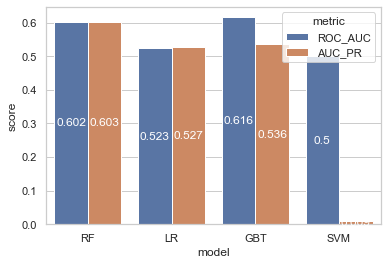

In [21]:
g = sns.barplot(x="model", y="score", hue='metric', data=eval_df)
for bar in g.patches:
    height = bar.get_height()
    g.text(bar.get_x() + bar.get_width() / 2., 0.5 * height, round(height,3),
                ha='center', va='center', color='white')